In [1]:
#Analyse Bank Customer data using Visual Analytics

In [2]:
#Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [2]:
#load the dataset
ds_bank= pd.read_csv("E:\Personal\Analytics\Assignment\Angshuman\Assignment_Bank-Customers-Data.csv")

In [3]:
ds_bank.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [4]:
ds_bank.tail()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
4009,200004010,Sam,Lewis,Male,64,Scotland,Other,30.Dec.15,19711.66
4010,200004011,Keith,Hughes,Male,52,Scotland,Blue Collar,30.Dec.15,56069.72
4011,200004012,Hannah,Springer,Female,50,Scotland,Other,30.Dec.15,59477.82
4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,30.Dec.15,239.45
4013,300004014,Stephen,May,Male,33,Wales,Blue Collar,30.Dec.15,30293.19


In [5]:
#describe the dataset
ds_bank.describe()

,Customer ID,Age,Balance
count,4.014000e+03,4014.000000,4014.000000
mean,1.696831e+08,38.611111,39766.448274
std,8.865374e+07,9.819121,29859.489192
min,1.000000e+08,15.000000,11.520000
25%,1.000020e+08,31.000000,16115.367500
50%,1.000038e+08,37.000000,33567.330000
75%,2.000031e+08,45.000000,57533.930000
max,4.000038e+08,64.000000,183467.700000


In [6]:
#check for null values
pd.isnull(ds_bank).any()

Customer ID           False
Name                  False
Surname               False
Gender                False
Age                   False
Region                False
Job Classification    False
Date Joined           False
Balance               False
dtype: bool

In [7]:
#check no of customers by region
ds_bank['Region'].value_counts()

England             2159
Scotland            1124
Wales                520
Northern Ireland     211
Name: Region, dtype: int64

C:\Users\sivaturi3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Text(0.5,0,'Region')

Text(0,0.5,'Customers count')

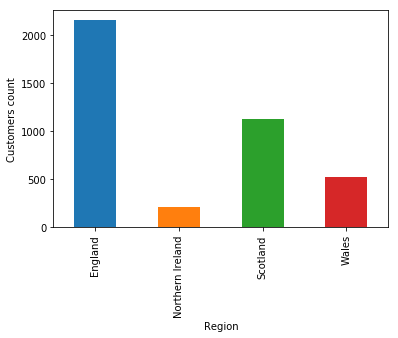

In [8]:
ds_bank.grpby_Region= ds_bank.groupby(['Region'])['Customer ID'].count()
plt.xlabel('Region')
plt.ylabel('Customers count')
ds_bank.grpby_Region.plot.bar()
plt.show()


In [9]:
#check the customers count by gender
ds_bank['Gender'].value_counts()

Male      2165
Female    1849
Name: Gender, dtype: int64

Text(0.5,0,'Gender')

Text(0,0.5,'Customers count')

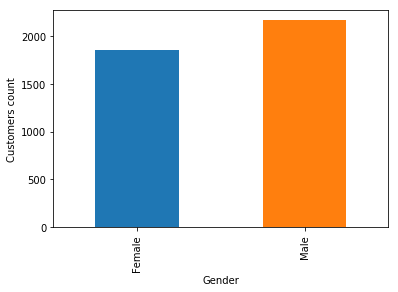

In [10]:
ds_bank_grpby_Gender=ds_bank.groupby(['Gender'])['Customer ID'].count()
plt.xlabel('Gender')
plt.ylabel('Customers count')
ds_bank_grpby_Gender.plot.bar()
plt.show()

In [11]:
#check customers count by job classification
ds_bank['Job Classification'].value_counts()

White Collar    1955
Blue Collar     1049
Other           1010
Name: Job Classification, dtype: int64

Text(0.5,0,'Job Classification')

Text(0,0.5,'Customers Count')

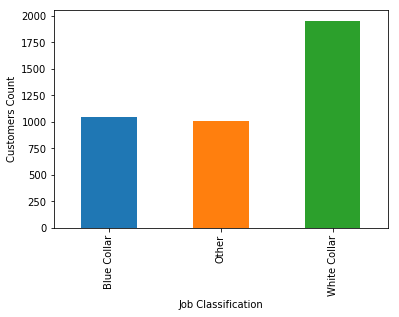

In [12]:
ds_bank_grpby_job_classification = ds_bank.groupby(['Job Classification'])['Customer ID'].count()
plt.xlabel('Job Classification')
plt.ylabel('Customers Count')
ds_bank_grpby_job_classification.plot.bar()
plt.show()

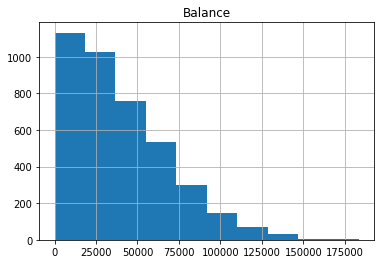

In [13]:
#check the balce of distribution
ds_bank.hist(column='Balance')
plt.show;

{'whiskers': [<matplotlib.lines.Line2D at 0x177dcd7c6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x177dcd7cf28>,
 'boxes': [<matplotlib.lines.Line2D at 0x177dcd7c198>],
 'medians': [<matplotlib.lines.Line2D at 0x177dcd887b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x177dcd88be0>],
 'means': []}

NameError: name 'plot' is not defined

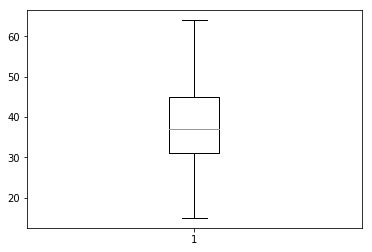

In [14]:
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
#variable
ax.boxplot(ds_bank['Age'])
plot.show()

(array([ 101.,  478., 1103., 1024.,  678.,  421.,  209.]),
 array([15., 22., 29., 36., 43., 50., 57., 64.]),
 <a list of 7 Patch objects>)

Text(0.5,1,'Age Distibution')

Text(0.5,0,'Age')

Text(0,0.5,'#Customer')

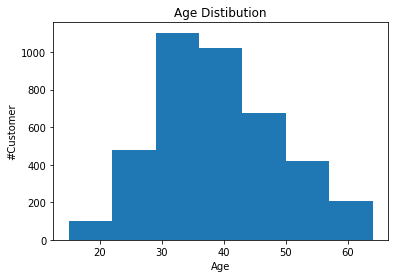

In [15]:
#plot inmatplotlib reside within a figure object, use plt.figure to create new figure 
#create more than one subplots using add_subplot, because we can't create balnk figure
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
#variable
ax.hist(ds_bank['Age'],bins=7)
#here we can play with number of bins
plt.title('Age Distibution')
plt.xlabel('Age')
plt.ylabel('#Customer')
plt.show()

Text(0.5,0,'Gender')

Text(0,0.5,'Sum of Balance')

Text(0.5,1,'Balance by Gender')

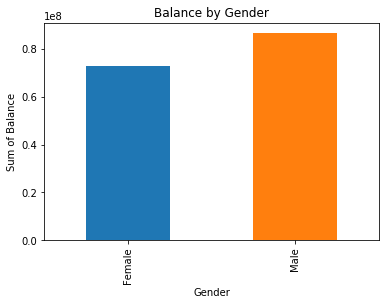

In [16]:
#Balance by Gender
var1=ds_bank.groupby('Gender').Balance.sum()# Gender level sum of sales grouped
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Sum of Balance')
ax1.set_title("Balance by Gender")
var1.plot(kind='bar')

Text(0.5,0,'Region')

Text(0,0.5,'Sum of Balance')

Text(0.5,1,'Balance by Region')

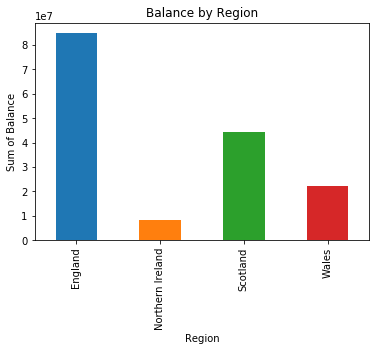

In [17]:
#Balance by Region
var2=ds_bank.groupby('Region').Balance.sum()#Region level sum of sales grouped
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Region')
ax1.set_ylabel('Sum of Balance')
ax1.set_title("Balance by Region")
var2.plot(kind='bar')

Text(0.5,0,'Job Classification')

Text(0,0.5,'Sum of Balance')

Text(0.5,1,'Balance by Job Classification')

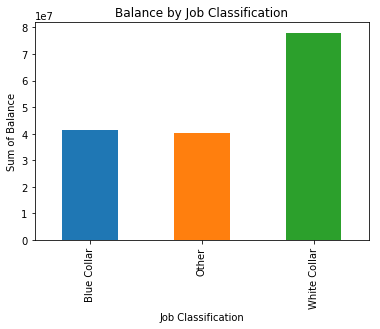

In [18]:
#Balance by Job Classification
var3=ds_bank.groupby('Job Classification').Balance.sum()#Job Classification level sum of sales grouped
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Job Classification')
ax1.set_ylabel('Sum of Balance')
ax1.set_title("Balance by Job Classification")
var3.plot(kind='bar')

In [19]:
#Bank customers duration calculation
ds_bank1=ds_bank.copy()
ds_bank1.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [20]:
ds_bank1.dtypes

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined            object
Balance               float64
dtype: object

In [21]:
ds_bank1['Date Joined']=pd.to_datetime(ds_bank1['Date Joined'])

In [22]:
ds_bank1.head()
ds_bank1.dtypes

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79


Customer ID                    int64
Name                          object
Surname                       object
Gender                        object
Age                            int64
Region                        object
Job Classification            object
Date Joined           datetime64[ns]
Balance                      float64
dtype: object

In [23]:
import datetime as dt

In [24]:
from datetime import datetime

In [25]:
from datetime import date

In [26]:
date1=date(2015,12,31)

In [27]:
#ds_bank1['days_since'] = datetime.today().date() - ds_bank1['Date Joined']
ds_bank1['days_since'] = date1 - ds_bank1['Date Joined']

TypeError: unsupported operand type(s) for -: 'DatetimeIndex' and 'datetime.date'

In [28]:
ds_bank1.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79
